In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#loading data
df = pd.read_csv('headbrain.csv')
x = df.iloc[:, 2:3].values
y = df['Brain Weight(grams)'].values

#splitting data into train & test
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state = 0)

#applying scaling to the data to make calculatios easier
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

train_x = train_x.ravel()

In [3]:
#LinearRegression algorithm code for 1 input

#initializing slope, learning rate & intercept
slope = 3
learning_rate = 0.1
intercept = 2

n = len(train_x)

def cal_loss(y_pred, train_y):
    loss = sum((train_y - y_pred) ** 2) / n
    return loss

old_loss = 0
while True:
    y_pred = slope*train_x + intercept
    
    #calculating loss
    loss = cal_loss(y_pred, train_y)
    
    #if loss does not changing then break the loop
    if old_loss == loss:
        break
    
    old_loss = loss
    
    #derivative of loss w.r.t slope & derivative of loss w.r.t intercept
    d_m = (-2/n) * sum((train_y - y_pred) * train_x)
    d_b = (-2/n) * sum(train_y - y_pred)

    #updating slope & intercept value
    slope = slope - learning_rate * d_m
    intercept = intercept - learning_rate * d_b

In [4]:
#model slope and intercept values
print('slope: ', slope, '\nintercept: ', intercept)

slope:  96.01268151556141 
intercept:  1281.0052909961241


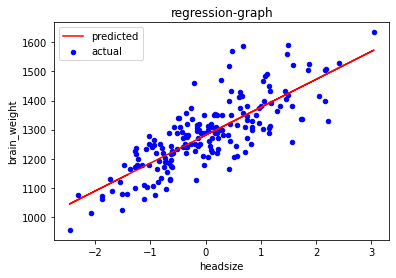

In [5]:
#plotting the data
plt.scatter(train_x, train_y, marker = 'o', color = 'blue', label = 'actual', s = 20)
plt.plot(train_x, y_pred, color = 'red', label = 'predicted')
plt.xlabel('headsize')
plt.ylabel('brain_weight')
plt.title('regression-graph')
plt.legend()
plt.show()

In [6]:
#veryfying our slope and intercept values with sklearn LinearRegression model
from sklearn.linear_model import LinearRegression

In [7]:
train_x = train_x.reshape(len(train_x), 1)
reg = LinearRegression()

reg.fit(train_x, train_y)

y_pred_model = reg.predict(train_x)

print('slope: ', reg.coef_[0], '\nintercept: ', reg.intercept_)
 
#got the same slope and intercept values as sklearn LinearRegression model got

slope:  96.01268151622801 
intercept:  1281.005291005291


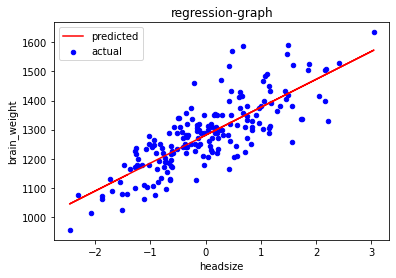

In [8]:
#plotting the data
plt.scatter(train_x, train_y, marker = 'o', color = 'blue', label = 'actual', s = 20)
plt.plot(train_x, y_pred_model, color = 'red', label = 'predicted')
plt.xlabel('headsize')
plt.ylabel('brain_weight')
plt.title('regression-graph')
plt.legend()
plt.show()

Now for 2 input field data

In [9]:
#loading data
df = pd.read_csv('area1.csv')

In [10]:
#data preprocessing
town_dummies = pd.get_dummies(df['town'], drop_first = True)
df = pd.concat([df, town_dummies], axis = 'columns')
df.drop(columns = ['town'], axis = 'columns', inplace = True)

In [11]:
x = df.iloc[:,[0, 2, 3]].values
y = df['price'].values

In [12]:
#scaling of data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [13]:
def cal_loss(y_pred, y):
    loss = sum((y - y_pred) ** 2) / n
    return loss

In [14]:
#LinearRegression algorithm code for 3 inputs

#initializing slopes, learning rate & intercept
slope1 = 1
slope2 = 1
slope3 = 1
intercept = 1
learning_rate = 0.01

n = len(x)

old_loss = 0

while True:
    y_pred = slope1*x[:, 0] + slope2*x[:, 1] + slope3*x[:, 2] + intercept
    
    loss = cal_loss(y_pred, y)
    
    #if loss does not changing then break the loop
    if old_loss == loss:
        break
    
    old_loss = loss
    
    com = y_pred - y
    #calculating derivative of loss w.r.t slopes & intercept
    d_slope1 = (2/n) * sum(com * x[:, 0])
    d_slope2 = (2/n) * sum(com * x[:, 1])
    d_slope3 = (2/n) * sum(com * x[:, 2])
    d_intercept = (2/n) * sum(com)
    
    #updating slopes & intercept values
    slope1 = slope1 - learning_rate * d_slope1
    slope2 = slope2 - learning_rate * d_slope2
    slope3 = slope3 - learning_rate * d_slope3
    intercept = intercept - learning_rate * d_intercept

In [15]:
#model slopes and intercept values
print(slope1, slope2, slope3, intercept)

55339.143631083745 11855.262926406762 18467.984834833176 629230.769230762


In [16]:
#veryfying our slope and intercept values with sklearn LinearRegression model
reg = LinearRegression()
reg.fit(x, y)
print(reg.coef_, reg.intercept_)

[55339.14559027 11855.26685742 18467.9886873 ] 629230.7692307692


In [17]:
#got the same slope and intercept values as sklearn LinearRegression model got